In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
%matplotlib inline

## 7.5综合示例——星巴克店铺数据集

### 7.5.1数据来源

In [7]:
starbucks.groupby("Brand")['Brand'].count()

Brand
Coffee House Holdings        1
Evolution Fresh              2
Starbucks                25249
Teavana                    348
Name: Brand, dtype: int64

In [2]:
starbucks = pd.read_csv(open('F:/teaching/数据科学基础/data/数据/directory.csv',encoding='utf-8'))  #encoding='utf-8'参数解决编码问题
#starbucks = pd.read_csv('F:/teaching/数据科学基础/data/数据/directory.csv')
starbucks.head()

Brand  Store Number        Store Name Ownership Type  \
0  Starbucks  47370-257954     Meritxell, 96       Licensed   
1  Starbucks  22331-212325  Ajman Drive Thru       Licensed   
2  Starbucks  47089-256771         Dana Mall       Licensed   
3  Starbucks  22126-218024        Twofour 54       Licensed   
4  Starbucks  17127-178586      Al Ain Tower       Licensed   

                    Street Address              City State/Province Country  \
0                Av. Meritxell, 96  Andorra la Vella              7      AD   
1             1 Street 69, Al Jarf             Ajman             AJ      AE   
2     Sheikh Khalifa Bin Zayed St.             Ajman             AJ      AE   
3                  Al Salam Street         Abu Dhabi             AZ      AE   
4  Khaldiya Area, Abu Dhabi Island         Abu Dhabi             AZ      AE   

  Postcode Phone Number                 Timezone  Longitude  Latitude  
0    AD500    376818720  GMT+1:00 Europe/Andorra       1.53     42.51  
1      NaN          NaN     GMT+04:00 Asia/Dubai      55.47     25.42  
2      NaN          NaN     GMT+04:00 Asia/Dubai      55.47     25.39  
3      NaN          NaN     GMT+04:00 Asia/Dubai      54.38     24.48  
4      NaN          NaN     GMT+04:00 Asia/Dubai      54.54     24.51

### 7.5.2定义问题

在全球的分布情况，哪些国家店铺较多，哪些城市店铺较多，在我国的分布情况。

### 7.5.3数据清洗

In [11]:
#查看City、State/Province、Country字段是否有缺失值
starbucks.isnull().sum()

Brand                0
Store Number         0
Store Name           0
Ownership Type       0
Street Address       2
City                15
State/Province       0
Country              0
Postcode          1522
Phone Number      6861
Timezone             0
Longitude            1
Latitude             1
dtype: int64

In [7]:
#进一步分析City为空值的数据
starbucks[starbucks['City'].isnull()]

Brand  Store Number         Store Name Ownership Type  \
5069   Starbucks  31657-104436        سان ستيفانو       Licensed   
5088   Starbucks  32152-109504        النايل سيتى       Licensed   
5089   Starbucks  32314-115172  أسكندرية الصحراوى       Licensed   
5090   Starbucks  31479-105246          مكرم عبيد       Licensed   
5091   Starbucks  31756-107161       سيتى ستارز 1       Licensed   
5092   Starbucks   1397-139244       سيتى ستارز 3       Licensed   
5093   Starbucks  32191-116645    معادى سيتى سنتر       Licensed   
5094   Starbucks   3664-142484       سليمان أباظة       Licensed   
5095   Starbucks   3562-131562             تيفولى       Licensed   
5096   Starbucks  31646-106547       مطار القاهرة       Licensed   
5097   Starbucks  31755-107182  سنافير - نعمه بيه       Licensed   
5098   Starbucks  32389-107342      المركاتو مول2       Licensed   
5099   Starbucks  32490-111349         خان لاجونا       Licensed   
9871   Starbucks  26909-228505  Vivacity Megamall       Licensed   
10767  Starbucks  31429-102231      ابراج البيت 1       Licensed   

                                          Street Address City State/Province  \
5069                     طريق الكورنيش أبراج سان ستيفانو  NaN            ALX   
5088                      كورنيش النيل أبراج النايل سيتى  NaN              C   
5089   الكيلو 28 طريق الاسكندرية الصحراوى, سيتى سنتر ...  NaN              C   
5090                      شارع مكرم عبيد, سيتى ستارز مول  NaN              C   
5091                  شارع عمر بن الخطاب, سيتى ستارز مول  NaN              C   
5092                  شارع عمر بن الخطاب, كارفور المعادى  NaN              C   
5093                             القطامية الطريق الدائرى  NaN              C   
5094           34شارع سليمان أباظة المهندسين, تيفولى مول  NaN              C   
5095    ألماظة ميدان الجوهر شارع أحمد فوزى, صالة السفر 1  NaN              C   
5096             صالة السفر 1- مطار القاهرة, فندق سنافير  NaN              C   
5097               فندق سنافير - نعمة بيه, المركاتو مول2  NaN             JS   
5098   الهضبة - الملركاتو2 بجوار المسرح الرومانى, مول...  NaN             JS   
5099                           خليج نبق مول - خان لاجونا  NaN             JS   
9871                                              NA, Na  NaN             13   
10767                   شارع اجياد- باب الملك عبد العزيز  NaN              2   

      Country Postcode Phone Number                     Timezone  Longitude  \
5069       EG      NaN  20120800287        GMT+2:00 Africa/Cairo      29.96   
5088       EG      NaN  20120800307        GMT+2:00 Africa/Cairo      31.23   
5089       EG      NaN  20185022214        GMT+2:00 Africa/Cairo      31.03   
5090       EG      NaN  20120800332        GMT+2:00 Africa/Cairo      31.34   
5091       EG      NaN  20120800350        GMT+2:00 Africa/Cairo      31.33   
5092       EG      NaN  20120029885        GMT+2:00 Africa/Cairo      31.33   
5093       EG      NaN  20185002677        GMT+2:00 Africa/Cairo      31.30   
5094       EG      NaN    129007799        GMT+2:00 Africa/Cairo      31.20   
5095       EG      NaN  018-0819995        GMT+2:00 Africa/Cairo      31.34   
5096       EG      NaN  20120800335        GMT+2:00 Africa/Cairo      31.41   
5097       EG      NaN  20120800327        GMT+2:00 Africa/Cairo      34.33   
5098       EG      NaN  20185022217        GMT+2:00 Africa/Cairo      34.33   
5099       EG      NaN  20189888547        GMT+2:00 Africa/Cairo      34.43   
9871       MY      NaN     82263673  GMT+08:00 Asia/Kuala_Lumpur     110.36   
10767      SA      NaN  96625719012        GMT+03:00 Asia/Riyadh      39.83   

       Latitude  
5069      31.24  
5088      30.07  
5089      30.06  
5090      30.09  
5091      30.06  
5092      30.06  
5093      29.99  
5094      30.06  
5095      30.08  
5096      30.11  
5097      27.91  
5098      27.92  
5099      28.04  
9871       1.53  
10767     21.42

In [19]:
#多此一举！
def fill_na(x):
    return x

In [6]:
#用State/Province填充City里的缺失值
#starbucks['City'] = starbucks['City'].fillna(fill_na(starbucks['State/Province']))
starbucks['City'] = starbucks['City'].fillna(starbucks['State/Province'])
starbucks[starbucks['Country']=='EG']

Brand  Store Number                         Store Name  \
5069  Starbucks  31657-104436                        سان ستيفانو   
5070  Starbucks  15433-161464                          Cityscape   
5071  Starbucks  25827-242606                         The Corner   
5072  Starbucks  26054-236446                            The Hub   
5073  Starbucks  25473-241146  Drive Thru Emirates Gas Station 2   
5074  Starbucks  29652-254745                    City Stars Mall   
5075  Starbucks  25472-241147                      Point 90 Mall   
5076  Starbucks  19742-200007             Cairo Festival City II   
5077  Starbucks  20111-200005               Gallaria 40 (Closed)   
5078  Starbucks  19539-202105               Tivoli Dome - Marina   
5079  Starbucks  25471-241148                          Water way   
5080  Starbucks  27462-247749                     Gameit Eldowal   
5081  Starbucks  15432-161465                    Dandy Mega Mall   
5082  Starbucks  19743-200006                Cairo Festival City   
5083  Starbucks  25470-241149                   Porto Cairo Mall   
5084  Starbucks  15599-157707                      Sun City Mall   
5085  Starbucks  16894-171864                         Zayed Dome   
5086  Starbucks  16565-172944                  Katameya Downtown   
5087  Starbucks  26786-245544                City Square - Cairo   
5088  Starbucks  32152-109504                        النايل سيتى   
5089  Starbucks  32314-115172                  أسكندرية الصحراوى   
5090  Starbucks  31479-105246                          مكرم عبيد   
5091  Starbucks  31756-107161                       سيتى ستارز 1   
5092  Starbucks   1397-139244                       سيتى ستارز 3   
5093  Starbucks  32191-116645                    معادى سيتى سنتر   
5094  Starbucks   3664-142484                       سليمان أباظة   
5095  Starbucks   3562-131562                             تيفولى   
5096  Starbucks  31646-106547                       مطار القاهرة   
5097  Starbucks  31755-107182                  سنافير - نعمه بيه   
5098  Starbucks  32389-107342                      المركاتو مول2   
5099  Starbucks  32490-111349                         خان لاجونا   

     Ownership Type                                     Street Address   City  \
5069       Licensed                    طريق الكورنيش أبراج سان ستيفانو    ALX   
5070       Licensed                 6 Of Octobe, El Horya Square, Giza  Cairo   
5071       Licensed  Zaker Hussein St. extension, Plot no. 4, Unit ...  Cairo   
5072       Licensed  Unit no :A1 Front of British School, 6 of oct/...  Cairo   
5073       Licensed  Plot Number 11B06, Ring road, Cairo festival c...  Cairo   
5074       Licensed                         City stars Mall, Nasr city  Cairo   
5075       Licensed  Plot no: 35 south investors zone, off 90 road,...  Cairo   
5076       Licensed               Ring Rd and 90th, New Cairo District  Cairo   
5077       Licensed  26th of July Rd, Alsheikh Zayed, 6th of Octobe...  Cairo   
5078       Licensed                   Marina - Gate 5, Marina District  Cairo   
5079       Licensed  22 A first settlement ,North Investors, New Cairo  Cairo   
5080       Licensed                 Gamiet Eldowal Street, Mohandeseen  Cairo   
5081       Licensed   Alex Dandy Mega Mall, Alex desert Road - Kilo 28  Cairo   
5082       Licensed                        Ring rd and 90th, New Cairo  Cairo   
5083       Licensed  The Ring Road, New Cairo, New Cairo, First set...  Cairo   
5084       Licensed   Sun City, Nasr St. Nasr City, Air Side, Arrivals  Cairo   
5085       Licensed  Zayed Dome complex-block no 8-part 3, District...  Cairo   
5086       Licensed                               Street 90, New Cairo  Cairo   
5087       Licensed  CITY Square Mall - Al Rehab City, New Cairo, أ...  Cairo   
5088       Licensed                     كورنيش النيل أبراج النايل سيتى      C   
5089       Licensed  الكيلو 28 طريق الاسكندرية الصحراوى, سيتى سنتر ...      C   
5090       Licensed                     شارع مكرم ع

In [20]:
#过滤数据，值选取Starbucks品牌的
starbucks['Brand'].unique()

array(['Starbucks', 'Teavana', 'Evolution Fresh', 'Coffee House Holdings'],
      dtype=object)

In [21]:
new_data = starbucks[starbucks['Brand'] == 'Starbucks']

In [22]:
new_data['Brand'].unique()

array(['Starbucks'], dtype=object)

In [24]:
new_data.to_csv('F:/teaching/数据科学基础/data/数据/starbucks.csv',index=False,encoding='utf-8')

### 7.5.4数据探索

In [13]:
starbucks = pd.read_csv('F:/teaching/数据科学基础/data/数据/starbucks.csv')
starbucks.head()

Brand  Store Number        Store Name Ownership Type  \
0  Starbucks  47370-257954     Meritxell, 96       Licensed   
1  Starbucks  22331-212325  Ajman Drive Thru       Licensed   
2  Starbucks  47089-256771         Dana Mall       Licensed   
3  Starbucks  22126-218024        Twofour 54       Licensed   
4  Starbucks  17127-178586      Al Ain Tower       Licensed   

                    Street Address              City State/Province Country  \
0                Av. Meritxell, 96  Andorra la Vella              7      AD   
1             1 Street 69, Al Jarf             Ajman             AJ      AE   
2     Sheikh Khalifa Bin Zayed St.             Ajman             AJ      AE   
3                  Al Salam Street         Abu Dhabi             AZ      AE   
4  Khaldiya Area, Abu Dhabi Island         Abu Dhabi             AZ      AE   

  Postcode Phone Number                 Timezone  Longitude  Latitude  
0    AD500    376818720  GMT+1:00 Europe/Andorra       1.53     42.51  
1      NaN          NaN     GMT+04:00 Asia/Dubai      55.47     25.42  
2      NaN          NaN     GMT+04:00 Asia/Dubai      55.47     25.39  
3      NaN          NaN     GMT+04:00 Asia/Dubai      54.38     24.48  
4      NaN          NaN     GMT+04:00 Asia/Dubai      54.54     24.51

In [16]:
starbucks["Country"].replace('TW',"CN",inplace=True)

In [27]:
starbucks.shape

(25249, 13)

In [17]:
len(starbucks['Country'].unique())

72

In [29]:
len(starbucks['City'].unique())

5406

In [18]:
country_count = starbucks['Country'].value_counts()[0:10]
country_count

US    13311
CN     3128
CA     1415
JP     1237
KR      993
GB      901
MX      579
TR      326
PH      298
TH      289
Name: Country, dtype: int64

In [19]:
plt.style.use('ggplot')    #设置图表样式
labels = list(country_count.index)  #刻度标签
plt.xlabel('Country')  #设置X轴标签
plt.ylabel('Count')  #设置Y轴标签
plt.title('Country Top 10')
plt.bar(range(len(labels)),country_count)
plt.xticks(range(len(labels)),labels,fontsize=12) #设置刻度和刻度标签

([<matplotlib.axis.XTick at 0x25e566fc460>,
 [Text(0, 0, 'US'),
  Text(0, 0, 'CN'),
  Text(0, 0, 'CA'),
  Text(0, 0, 'JP'),
  Text(0, 0, 'KR'),
  Text(0, 0, 'GB'),
  Text(0, 0, 'MX'),
  Text(0, 0, 'TR'),
  Text(0, 0, 'PH'),
  Text(0, 0, 'TH')])

In [20]:
city_count = starbucks['City'].value_counts()[0:10]
city_count

上海市            542
Seoul          243
北京市            234
New York       230
London         215
Toronto        186
Mexico City    180
Chicago        179
Las Vegas      153
Houston        151
Name: City, dtype: int64

In [36]:
plt.figure(figsize=(10,6))  #设置图片大小
plt.rcParams['font.sans-serif'] = ['simhei'] #指定默认字体
#plt.rcParams['axes.unicode_minus'] = False   #解决保存图像时负号'-'显示为方块的问题
labels = list(city_count.index)  #刻度标签
plt.xlabel('City')  #设置X轴标签
plt.ylabel('Count')  #设置Y轴标签
plt.title('City Top 10')
plt.bar(range(len(labels)),city_count)
plt.xticks(range(len(labels)),labels) #设置刻度和刻度标签

([<matplotlib.axis.XTick at 0x1a9a76f1670>,
 [Text(0, 0, '上海市'),
  Text(0, 0, 'Seoul'),
  Text(0, 0, '北京市'),
  Text(0, 0, 'New York'),
  Text(0, 0, 'London'),
  Text(0, 0, 'Toronto'),
  Text(0, 0, 'Mexico City'),
  Text(0, 0, 'Chicago'),
  Text(0, 0, 'Las Vegas'),
  Text(0, 0, 'Houston')])

In [37]:
ownership_count = starbucks['Ownership Type'].value_counts()[0:10]
ownership_count

Company Owned    11581
Licensed          9375
Joint Venture     3976
Franchise          317
Name: Ownership Type, dtype: int64

In [21]:
china_data = starbucks[starbucks['Country'] == 'CN']
china_data.head()

Brand  Store Number  Store Name Ownership Type  \
2038  Starbucks  22901-225145   北京西站第一咖啡店  Company Owned   
2039  Starbucks  32320-116537     北京华宇时尚店  Company Owned   
2040  Starbucks  32447-132306  北京蓝色港湾圣拉娜店  Company Owned   
2041  Starbucks  17477-161286  北京太阳宫凯德嘉茂店  Company Owned   
2042  Starbucks  24520-237564     北京东三环北店  Company Owned   

                                 Street Address City State/Province Country  \
2038                  丰台区, 北京西站通廊7-1号, 中关村南大街2号  北京市             11      CN   
2039  海淀区, 数码大厦B座华宇时尚购物中心内, 蓝色港湾国际商区1座C1-3单元首层、  北京市             11      CN   
2040        朝阳区朝阳公园路6号, 二层C1-3单元及二层阳台, 太阳宫中路12号  北京市             11      CN   
2041          朝阳区, 太阳宫凯德嘉茂一层01-44/45号, 东三环北路27号  北京市             11      CN   
2042              朝阳区, 嘉铭中心大厦A座B1层024商铺, 金融大街7号  北京市             11      CN   

     Postcode  Phone Number                Timezone  Longitude  Latitude  
2038   100073           NaN  GMT+08:00 Asia/Beijing     116.32     39.90  
2039   100086  010-51626616  GMT+08:00 Asia/Beijing     116.32     39.97  
2040   100020  010-59056343  GMT+08:00 Asia/Beijing     116.47     39.95  
2041   100028  010-84150945  GMT+08:00 Asia/Beijing     116.45     39.97  
2042      NaN           NaN  GMT+08:00 Asia/Beijing     116.46     39.93

In [22]:
china_data.to_csv('F:/teaching/数据科学基础/data/数据/cn_starbucks.csv',index=False,encoding='utf-8')

In [23]:
cn_starbucks = pd.read_csv('F:/teaching/数据科学基础/data/数据/cn_starbucks.csv')
cn_starbucks.head()

Brand  Store Number  Store Name Ownership Type  \
0  Starbucks  22901-225145   北京西站第一咖啡店  Company Owned   
1  Starbucks  32320-116537     北京华宇时尚店  Company Owned   
2  Starbucks  32447-132306  北京蓝色港湾圣拉娜店  Company Owned   
3  Starbucks  17477-161286  北京太阳宫凯德嘉茂店  Company Owned   
4  Starbucks  24520-237564     北京东三环北店  Company Owned   

                              Street Address City State/Province Country  \
0                  丰台区, 北京西站通廊7-1号, 中关村南大街2号  北京市             11      CN   
1  海淀区, 数码大厦B座华宇时尚购物中心内, 蓝色港湾国际商区1座C1-3单元首层、  北京市             11      CN   
2        朝阳区朝阳公园路6号, 二层C1-3单元及二层阳台, 太阳宫中路12号  北京市             11      CN   
3          朝阳区, 太阳宫凯德嘉茂一层01-44/45号, 东三环北路27号  北京市             11      CN   
4              朝阳区, 嘉铭中心大厦A座B1层024商铺, 金融大街7号  北京市             11      CN   

  Postcode  Phone Number                Timezone  Longitude  Latitude  
0   100073           NaN  GMT+08:00 Asia/Beijing     116.32     39.90  
1   100086  010-51626616  GMT+08:00 Asia/Beijing     116.32     39.97  
2   100020  010-59056343  GMT+08:00 Asia/Beijing     116.47     39.95  
3   100028  010-84150945  GMT+08:00 Asia/Beijing     116.45     39.97  
4      NaN           NaN  GMT+08:00 Asia/Beijing     116.46     39.93

In [67]:
city_count = cn_starbucks['City'].value_counts()[0:10]
city_count

上海市          542
北京市          234
杭州市          117
深圳市          113
广州市          106
Hong Kong    104
成都市           98
苏州市           90
南京市           73
武汉市           67
Name: City, dtype: int64

In [26]:
cn_starbucks['City'] = cn_starbucks['City'].replace('Hong Kong','香港')
cn_starbucks['City'] = cn_starbucks['City'].replace('Taipei City','台北市')
city_count = cn_starbucks['City'].value_counts()[0:10]
city_count

上海市    542
北京市    234
台北市    126
杭州市    117
深圳市    113
广州市    106
香港     104
成都市     98
苏州市     90
南京市     73
Name: City, dtype: int64

([<matplotlib.axis.YTick at 0x25e56aa2700>,
 [Text(0, 0, '上海市'),
  Text(0, 0, '北京市'),
  Text(0, 0, '台北市'),
  Text(0, 0, '杭州市'),
  Text(0, 0, '深圳市'),
  Text(0, 0, '广州市'),
  Text(0, 0, '香港'),
  Text(0, 0, '成都市'),
  Text(0, 0, '苏州市'),
  Text(0, 0, '南京市')])

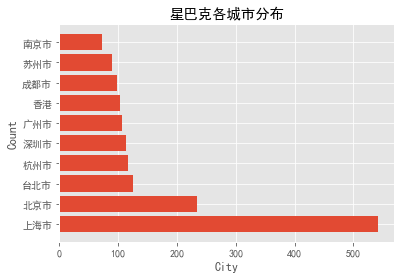

In [27]:
plt.rcParams['font.sans-serif'] = ['simhei'] #指定默认字体
plt.rcParams['axes.unicode_minus'] = False   #解决保存图像是负号'-'显示为方块的问题
labels = list(city_count.index)  #刻度标签
plt.xlabel('City')  #设置X轴标签
plt.ylabel('Count')  #设置Y轴标签
plt.title('星巴克各城市分布')
plt.barh(range(len(labels)),city_count)
plt.yticks(range(len(labels)),labels) #设置刻度和刻度标签